# Structural Reliability

A simulation dataset of a structural reliability model with one key output variable and four input variables is used for this case. 

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import simdec as sd

Let's first load the dataset. It's a CSV file, each row represent a simulation or sample. The first column is the output or quantity of interest and other columns are parameters' values.

In [2]:
fname = pathlib.Path("../../tests/data/stress.csv")

data = pd.read_csv(fname)
output_name, *inputs_names = list(data.columns)
inputs, output = data[inputs_names], data[output_name]
inputs.head()

,Kf,sigma_res,Rp0.2,R
0,2.454866,-84.530638,297.406169,-0.834480
1,2.774116,347.586947,379.499452,-0.131827
2,2.504617,946.567040,940.477667,-0.039126
3,2.466723,74.222224,406.622486,0.440311
4,2.615602,-32.937734,979.498038,0.419690


In [3]:
output.head()

0    311.898918
1    500.044381
2    715.171820
3    482.477633
4    663.983635
Name: delta_sig, dtype: float64

We can then compute sensitivity indices. In this case we will return Sobol' indices by using a simple binning approach.

In [4]:
indices = sd.sensitivity_indices(inputs=inputs, output=output)
indices

SensitivityAnalysisResult(si=array([0.03735157, 0.55436865, 0.13488759, 0.35593683]), first_order=array([0.03666241, 0.50270644, 0.10694638, 0.27702256]), second_order=array([[0.        , 0.        , 0.00137831, 0.        ],
       [0.        , 0.        , 0.        , 0.10332443],
       [0.00137831, 0.        , 0.        , 0.0545041 ],
       [0.        , 0.10332443, 0.0545041 , 0.        ]]))

With this information, we can decompose the problem with SimDec.

In [5]:
si = indices.si
res = sd.decomposition(inputs=inputs, output=output, sensitivity_indices=si)
res

DecompositionResult(var_names=['sigma_res', 'R'], statistic=array([[282.07754592, 407.79220985, 541.32231297],
       [434.89823001, 485.71976552, 534.1939336 ],
       [703.90456847, 725.15075719, 755.65161563]]), bins=               0           1           2           3           4           5  \
0     311.898918  565.755452  663.983635  409.659023  500.044381  482.477633   
1     210.727366  468.836865  496.688973  448.747937  461.183337  535.841646   
2      61.163271  474.595725  551.641014  387.720239  428.518186  534.050989   
3     126.402829  404.649624  419.194207  420.077617  472.827542  456.816425   
4      86.214556  245.112746  498.566253  362.089205  449.201292  414.209521   
...          ...         ...         ...         ...         ...         ...   
2551         NaN         NaN  544.400366         NaN         NaN         NaN   
2552         NaN         NaN  415.030100         NaN         NaN         NaN   
2553         NaN         NaN  476.182362         NaN        

These are the raw result, we can use some helper functions to make some visualization.
We need a nice color palettes, using the states we can get a palette for all variables.

In [6]:
palette = sd.palette(states=res.states)[::-1]
palette

[[0.0702614379084967, 0.43562091503267975, 0.41353874883286645, 1.0],
 [0.1227668845315904, 0.7203703703703704, 0.6842514783691254, 1.0],
 [0.5846405228758169, 0.9330065359477124, 0.9119514472455649, 1.0],
 [0.4956417501498417, 0.5004538059765391, 0.050526586180323685, 1.0],
 [0.7717498644290322, 0.778582641207866, 0.1397180123869053, 1.0],
 [0.9651425635756488, 0.9681736450038532, 0.6847675314667352, 1.0],
 [0.43562091503267975, 0.0702614379084967, 0.24892623716153087, 1.0],
 [0.7203703703703704, 0.1227668845315904, 0.41500155617802664, 1.0],
 [0.9330065359477124, 0.5846405228758169, 0.7549953314659192, 1.0]]

Here we are! Look at the decomposition itself with the bins.

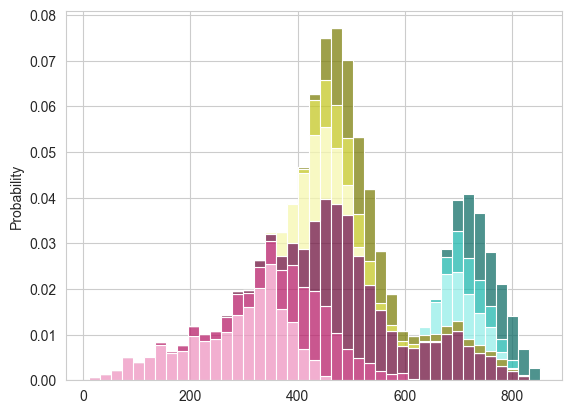

In [7]:
fig, ax = plt.subplots()
ax = sd.visualization(bins=res.bins, palette=palette, ax=ax)

We can also use a boxplot.

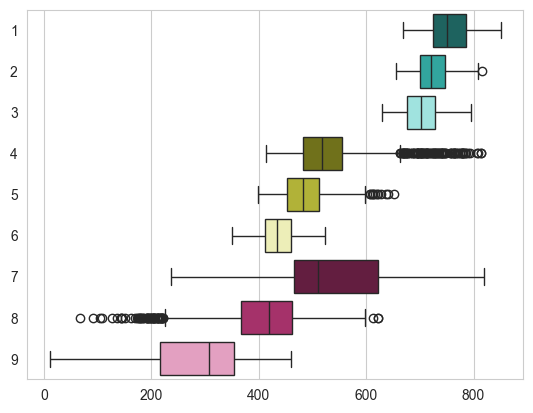

In [8]:
fig, ax = plt.subplots()
ax = sd.visualization(bins=res.bins, palette=palette, kind="boxplot", ax=ax)

Inputs 3 and 1 have the highest sensitivity indices and thus are automatically chosen for decomposition. The most influential input 3 divides the distribution of the output into three main states with distinct colors. Input 1 further subdivides them into shades. From the graph, it becomes obvious that input 1 influences the output when input 3 is low, but has a negligible effect when input 3 is medium or high.

Finally, we can get some statistics on all states and scenarios with a table.

In [9]:
table, styler = sd.tableau(
    statistic=res.statistic,
    var_names=res.var_names,
    states=res.states,
    bins=res.bins,
    palette=palette,
)
styler

Congratulations, now you know how to use SimDec to get more insights on your problem!